Before starting with my analysis, I'm importing all the packages required for the workbook.

In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
Data_1B=glob.glob('C:\\Users\\kjoseph\\Desktop\\Upgrad\\GDP Assignment\\GDP_Final\\NAD*.csv') #List of files for Data_1B part

In [3]:
#DataFrame for Data_1A
Data_1A=pd.read_csv('C:\\Users\\kjoseph\\Desktop\\Upgrad\\GDP Assignment\\GDP_Final\\ab40c054-5031-4376-b52e-9813e776f65e.csv')

# Part-I: GDP Analysis of the Indian States

We only need data corrsponding to the Indian States for our analyis. So I'm removing the unwanted columns belonging to Union Territories below.

In [4]:
Data_1A.drop(columns=['Delhi','Puducherry','Andaman & Nicobar Islands','Chandigarh'],inplace=True)

In [5]:
GSDP=Data_1A.loc[:5,:]
Growth=Data_1A.loc[6:,:]
#Here I'm splitting the original data into two parts for analysis purposes.

Now I am removing the unwanted columns from both DataFrame's.

In [6]:
Growth.reset_index(inplace=True)
Growth.drop(columns=['Items  Description','index'],inplace=True)
GSDP.drop(columns='Items  Description',inplace=True)

In [7]:
GSDP.isna().sum(axis=1)/GSDP.shape[1]*100 # Checking Percentage on NA values

0     3.225806
1     3.225806
2     3.225806
3     3.225806
4    29.032258
5    67.741935
dtype: float64

67% of the data for the year 2016-2017(index 5) is null. So it should've been dropped but since the question asked to keep as much data as possible, I am keeping it.

In [8]:
GSDP.isna().sum(axis=0)/GSDP.shape[0]*100

Duration               0.000000
Andhra Pradesh         0.000000
Arunachal Pradesh     16.666667
Assam                 16.666667
Bihar                 16.666667
Chhattisgarh           0.000000
Goa                   16.666667
Gujarat               16.666667
Haryana                0.000000
Himachal Pradesh      33.333333
Jammu & Kashmir       16.666667
Jharkhand             16.666667
Karnataka             16.666667
Kerala                16.666667
Madhya Pradesh         0.000000
Maharashtra           33.333333
Manipur               33.333333
Meghalaya              0.000000
Mizoram               33.333333
Nagaland              33.333333
Odisha                 0.000000
Punjab                33.333333
Rajasthan             33.333333
Sikkim                16.666667
Tamil Nadu             0.000000
Telangana              0.000000
Tripura               33.333333
Uttar Pradesh         16.666667
Uttarakhand           16.666667
West Bengal1         100.000000
All_India GDP          0.000000
dtype: f

100 % of data under West Bengal1 is empty so it is dropped.

In [9]:
GSDP.drop('West Bengal1',axis=1,inplace=True)
GSDP.drop(5,axis=0,inplace=True)

There are still a lot of nulls in the data frame. However-for my analyis-they are kept as it is, because imputing the data with mean/median will bias the data.

The data for each states are following a positive trend, so inorder to correctly impute the time-series data we may have to use interpolate() function with linear regression or any such method. This part, however is not done for the current analysis.

In [10]:
Growth.isna().sum(axis=1)/GSDP.shape[1]*100

0     3.333333
1     3.333333
2     3.333333
3    30.000000
4    70.000000
dtype: float64

In [11]:
Growth.isna().sum(axis=0)/GSDP.shape[0]*100

Duration               0.0
Andhra Pradesh         0.0
Arunachal Pradesh     20.0
Assam                 20.0
Bihar                 20.0
Chhattisgarh           0.0
Goa                   20.0
Gujarat               20.0
Haryana                0.0
Himachal Pradesh      40.0
Jammu & Kashmir       20.0
Jharkhand             20.0
Karnataka             20.0
Kerala                20.0
Madhya Pradesh         0.0
Maharashtra           40.0
Manipur               40.0
Meghalaya              0.0
Mizoram               40.0
Nagaland              40.0
Odisha                 0.0
Punjab                40.0
Rajasthan             40.0
Sikkim                20.0
Tamil Nadu             0.0
Telangana              0.0
Tripura               40.0
Uttar Pradesh         20.0
Uttarakhand           20.0
West Bengal1         100.0
All_India GDP          0.0
dtype: float64

Growth % data frame is also having the same null values as the GSDP data frame, so the same exclusions that were performed earlier are done here.

In [12]:
Growth.drop('West Bengal1',axis=1,inplace=True)

In [13]:
Growth

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
1,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
2,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
3,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
4,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


### Plot a graph for rows " % Growth over previous year" for all the states (not union territories)

In [14]:
States=list(Growth.columns)[1:-1] ##List of State Names
States=list(map(lambda x:x.strip(),States)) # Removing leading and trailing spaces.

In [15]:
Col={}
for i in Growth.columns[1:-1]:
    Col[i]=i.strip()
Growth.rename(columns=Col,inplace=True)

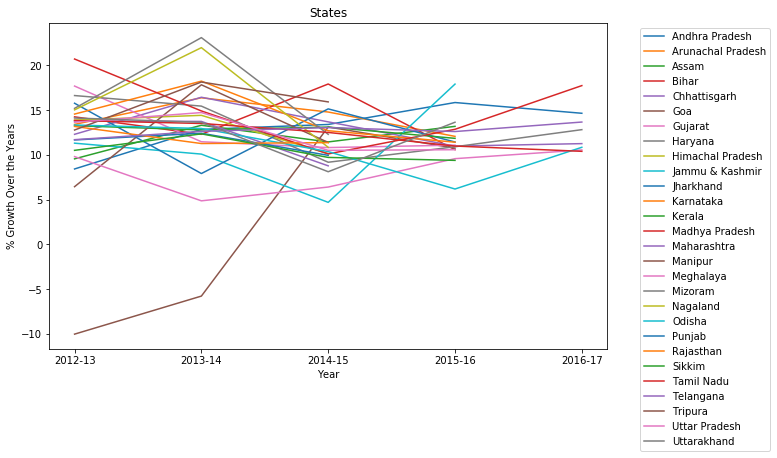

In [16]:
plt.figure(1,figsize=[10,6])

plt.subplot(111)
plt.title('States')
plt.plot(Growth.Duration,Growth[States])
plt.ylabel('% Growth Over the Years')
plt.xlabel('Year')
#plt.plot(Growth.Duration,Growth['All_India GDP'])
plt.legend(States,bbox_to_anchor=(1.05, 1))

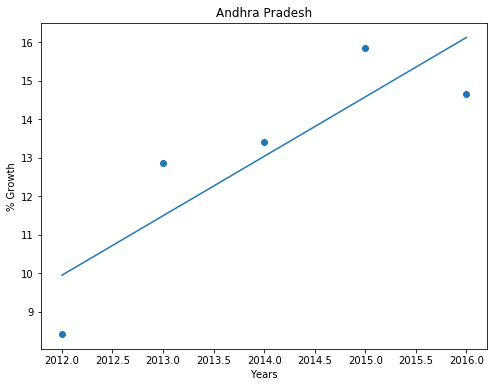

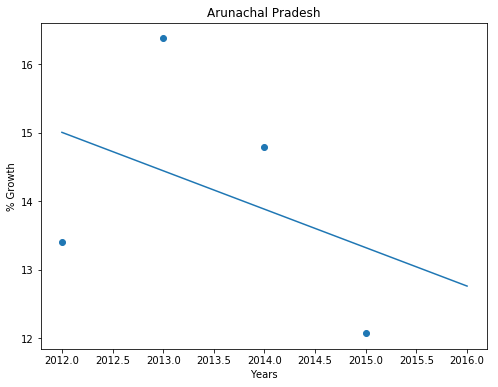

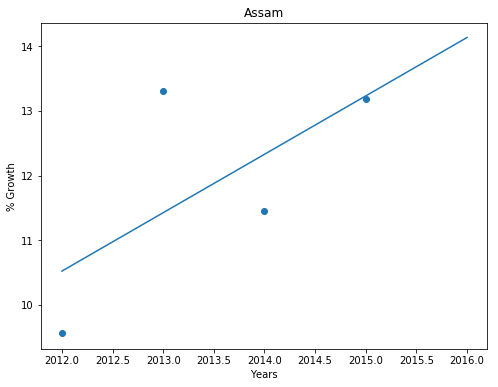

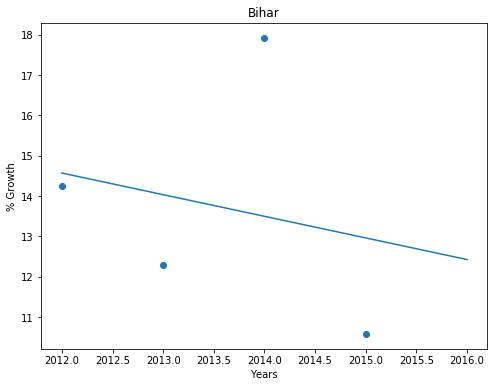

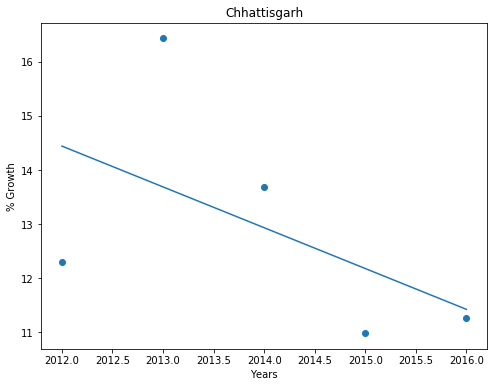

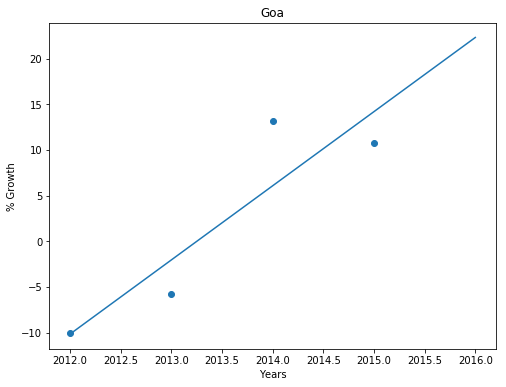

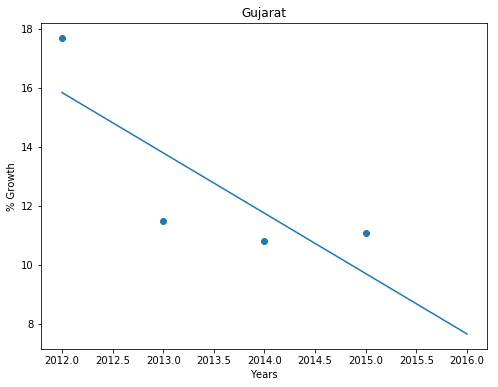

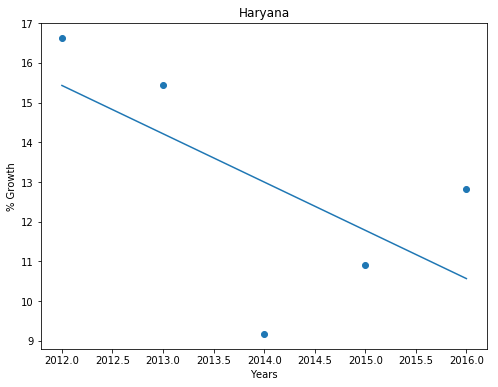

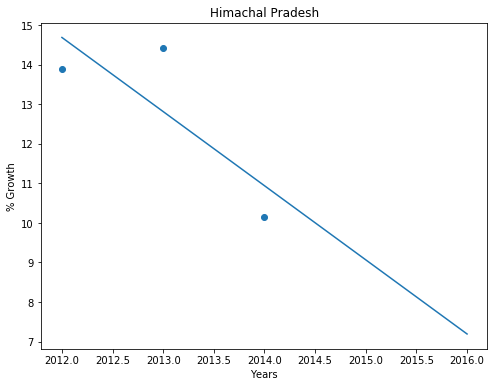

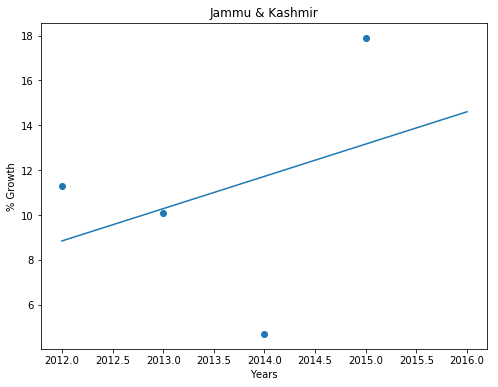

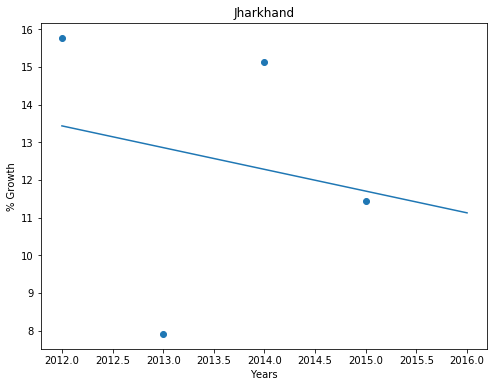

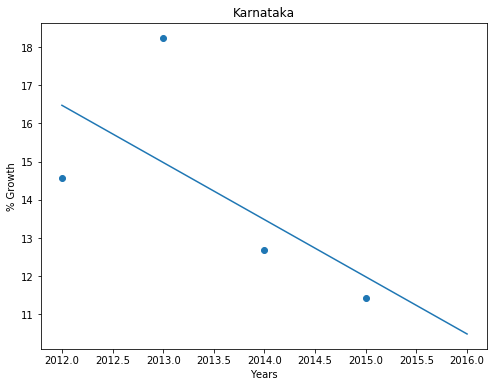

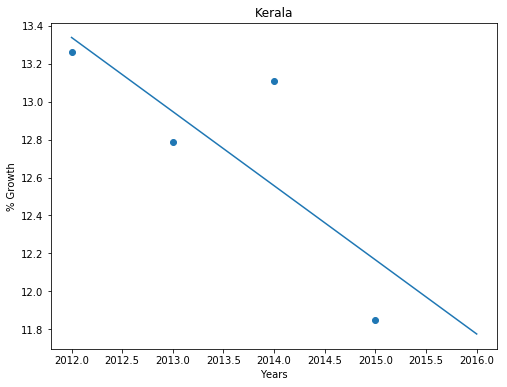

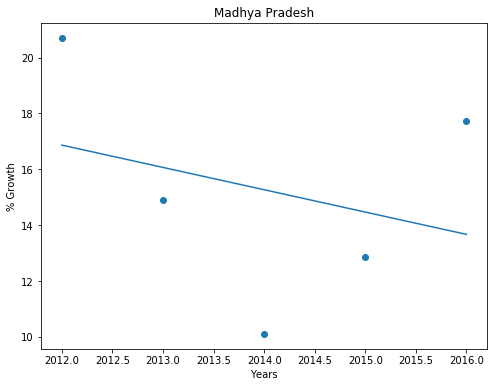

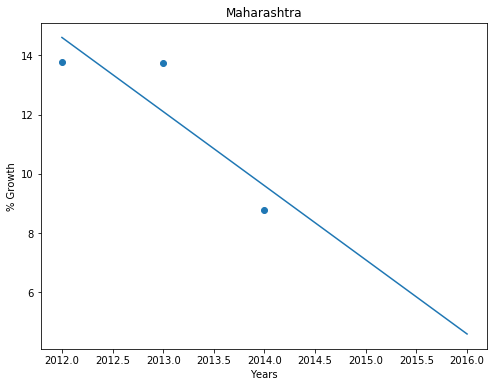

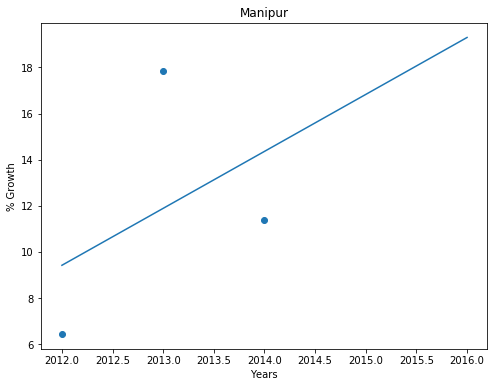

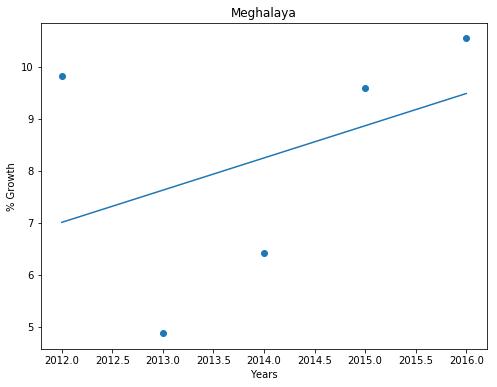

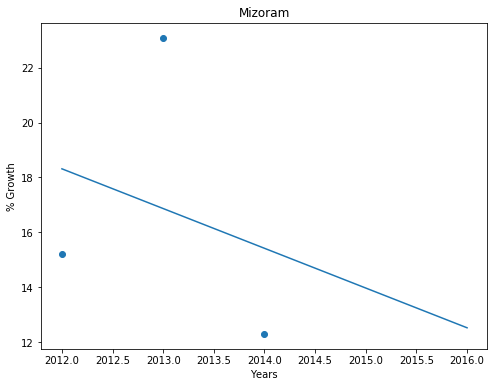

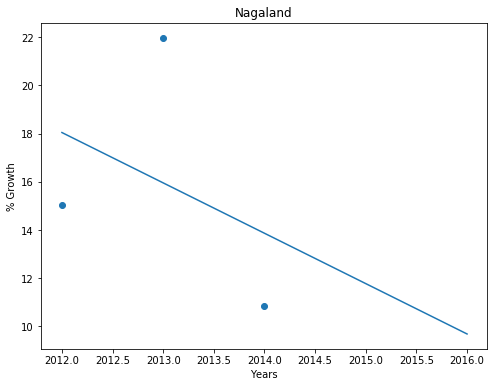

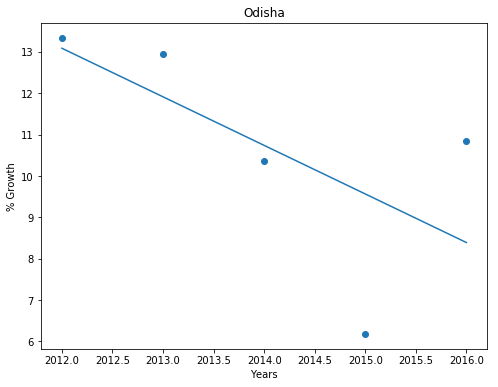

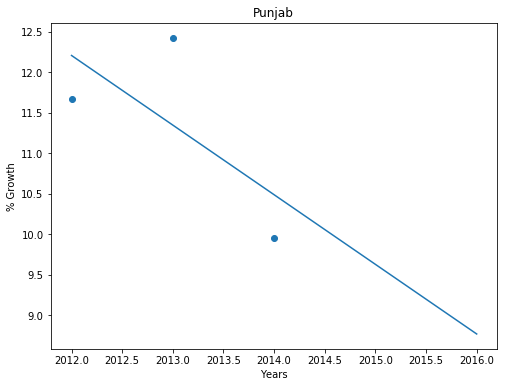

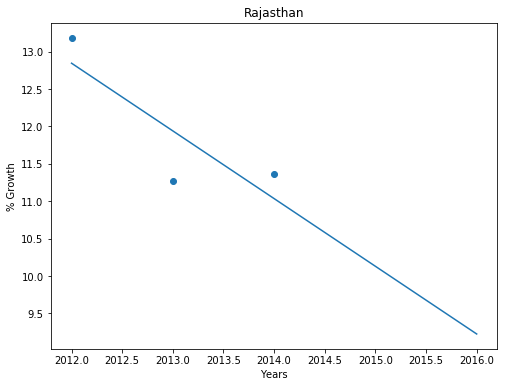

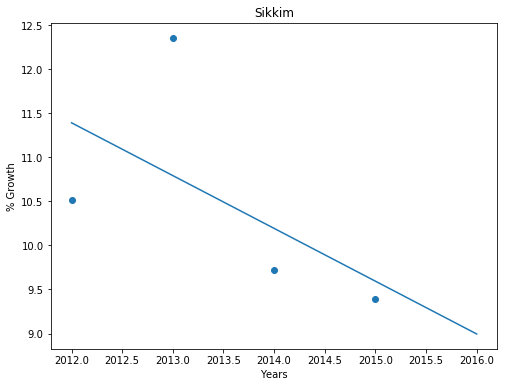

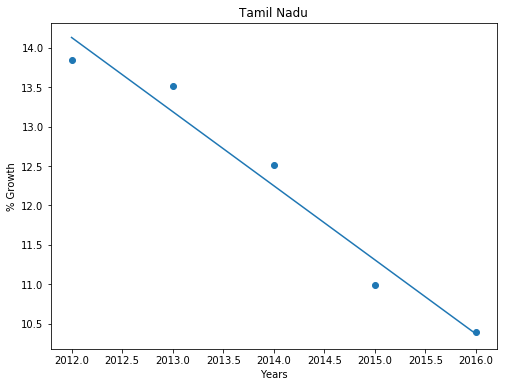

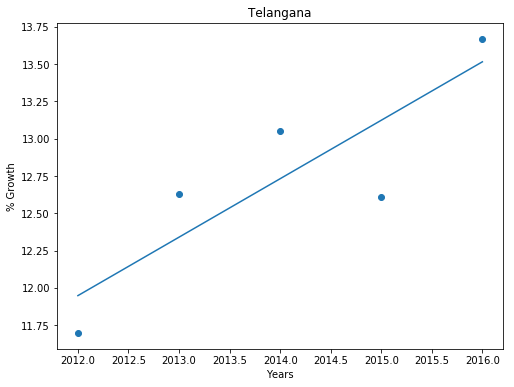

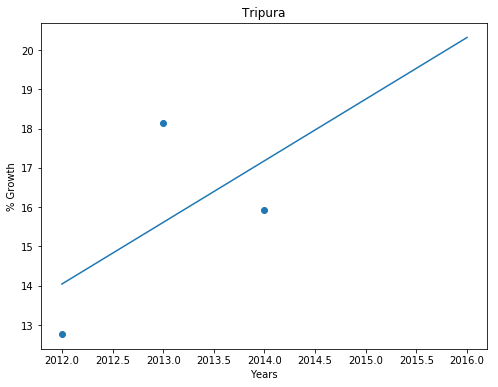

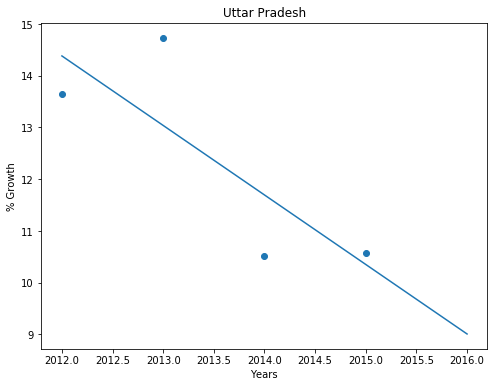

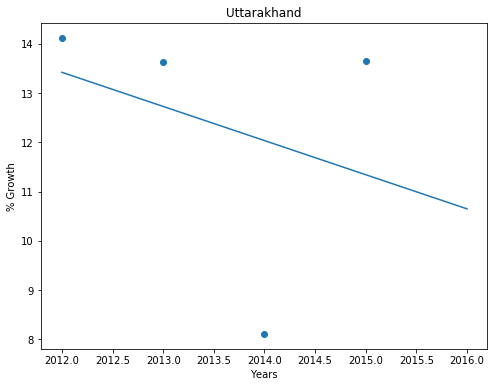

In [17]:
Growth['Year']=Growth.Duration.apply(lambda x:int(x[:4]))
from numpy.polynomial.polynomial import polyfit

Slope=pd.DataFrame()
j=1
for i in States:
    plt.figure(j,figsize=[8,6])
    #plt.subplot(7,4,j)
    idx = pd.isnull(Growth[i]) ## Removing na values before finding best fit line.
    m,c = np.polyfit(Growth[~idx].Year,Growth[~idx][i],1) ## Finding best fit line parameters.
    #Slope[i]=m
    Slope = Slope.append({'States': i,'GrowthRate':m},ignore_index=True)
    plt.scatter(Growth.Year,Growth[i])
    plt.plot(Growth.Year,m*Growth.Year+c)
    plt.xlabel('Years')
    plt.ylabel('% Growth')
    plt.title(i)
    j+=1
    

Text(0, 0.5, '% Growth over the Years')

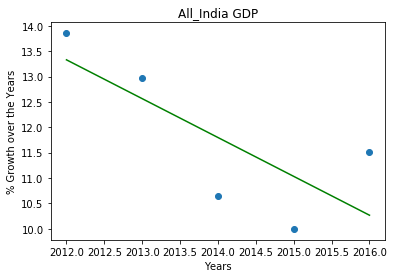

In [18]:
m,c = np.polyfit(Growth.Year,Growth['All_India GDP'],1) 
plt.scatter(Growth.Year,Growth['All_India GDP'])
plt.plot(Growth.Year,m*Growth.Year+c,'g')
plt.title('All_India GDP')
plt.xlabel('Years')
plt.ylabel('% Growth over the Years')

In [19]:
Slope=Slope[['States','GrowthRate']]
Slope.sort_values(by='GrowthRate',ascending=False)

,States,GrowthRate
5,Goa,8.120
15,Manipur,2.470
25,Tripura,1.570
0,Andhra Pradesh,1.544
9,Jammu & Kashmir,1.441
2,Assam,0.903
16,Meghalaya,0.619
24,Telangana,0.392
12,Kerala,-0.391
3,Bihar,-0.536


We can compare the growth rates of any two states by using the slope of their best fit lines:  
Top 3 States that have been consistentyl growing are :
Goa, Jammu and Kashmir, Andhra Pradesh

3 Slowest Growing States are:
Nagaland, Mizoram and Maharashtra

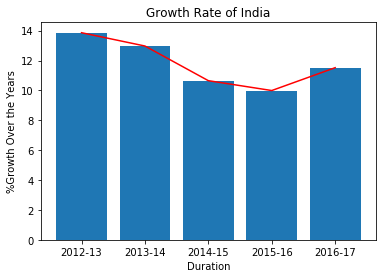

In [20]:
plt.bar(Growth.Duration,Growth['All_India GDP'])
plt.plot(Growth.Duration,Growth['All_India GDP'],'r')
plt.xlabel('Duration')
plt.ylabel('%Growth Over the Years')
plt.title('Growth Rate of India')
plt.show()

In [21]:
State_Growth=Growth.mean()[:-1]

In [22]:
State_Growth.sort_values(ascending=False,inplace=True)

Text(0, 0.5, 'Average Growth Rate')

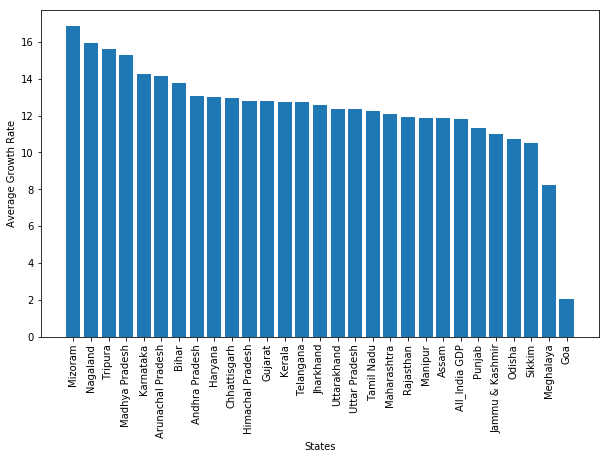

In [23]:
plt.figure(3,figsize=[10,6])
plt.bar(State_Growth.index,State_Growth)
plt.xticks(State_Growth.index, rotation='vertical')
plt.xlabel('States')
plt.ylabel('Average Growth Rate')

From the above graph, it is clearly evident which are the top5 and bottom5 states in terms of average GSDP.                     
#### Top 5 States are:   
    1.Mizoram   
    2.Nagaland   
    3.Tripura  
    4.Madhya Pradesh  
    5.Karnataka
#### Bottom 5 States are:   
    1.Goa   
    2.Meghalaya   
    3.Sikkim  
    4.Odisha  
    5.Jammu & Kashmir

In [24]:
Growth['All_India GDP'].mean()

11.797999999999998

National Average Growth is 11.87%

In [25]:
Growth['Kerala'].mean()

12.7525

Average Growth Rate of my home state(Kerala) is 12.75%. It is performing better than the national average by 0.88%

### Plot the total GDP of the states for the year 2015-16

In [26]:
GDP=GSDP[GSDP['Duration']=='2015-16']

In [27]:
GDP=GDP.T.iloc[1:-1,:]
GDP.rename(columns={4:'GSDP'},inplace=True)
GDP.sort_values(by='GSDP',ascending=False,inplace=True)
GDP=GDP.dropna()

Text(0.5, 1.0, 'Total GDP of the States')

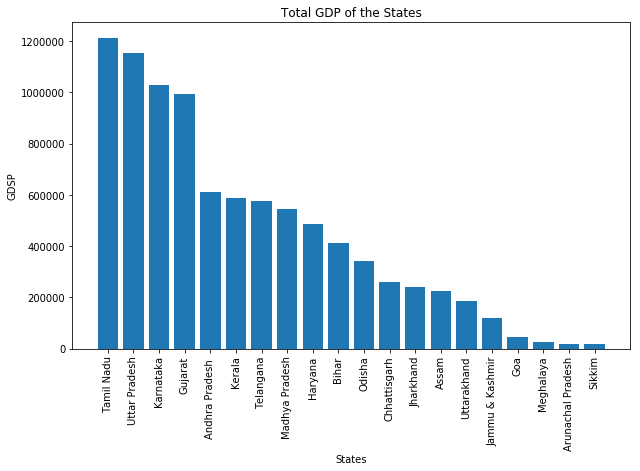

In [28]:
plt.figure(4,figsize=[10,6])
plt.bar(GDP.index,GDP.GSDP)
plt.xticks(GDP.index, rotation='vertical')
plt.xlabel('States')
plt.ylabel('GDSP')
plt.title('Total GDP of the States')

From the above graph we can clearly identify which are the top 5 and bottom 5 states based on GDP for the year 2015-16.   
#### Top 5 States are:   
    1.Tamil Nadu   
    2.Uttar Pradesh  
    3.Karnataka  
    4.Gujarat  
    5.Andhra Pradesh                               
#### Bottom 5 States are:   
    1.Sikkim   
    2.Arunachal Pradesh   
    3.Meghalaya
    4.Goa   
    5.Jammu & Kashmir
    
From above graph, we can see that the States towards the left are having higher GDSP than the states to the right. However, this is not a proper reflection of the state's performance. Because the States that have higher GSDP are high populous states and the States towards the right have lesser population.
Before judging which State is performing better than the other, we need to find out the GDP per capita of each state inorder to build some actual insights.

In [29]:
Growth.Goa

0   -10.02
1    -5.77
2    13.12
3    10.75
4      NaN
Name: Goa, dtype: float64

## Part 1-B

In [30]:
df_1B=pd.DataFrame() ## Code for importing multiple csv files from the directory.
for csv in Data_1B:
    temp=pd.read_csv(csv,encoding="cp1252")
    temp['Region']=os.path.basename(csv)
    df_1B=df_1B.append(temp,ignore_index=True)

In [31]:
df_1B.Region=df_1B.Region.apply(lambda x:x[x.find('-')+1:x.find('-',5)]) ## Indexing State names from file name.
df_1B.Region=df_1B.Region.apply(lambda x:x.replace('_',' '))

In [32]:
df_1B.Region.unique()

array(['Andaman Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh'], dtype=object)

In [33]:
df_1B.Region=df_1B.Region.apply(lambda x:'Jammu & Kashmir' if x=='Jammu Kashmir' else x) 
#Jammu and Kashmir is having naming issue so I'm coverting it to the required format.

In [34]:
list(df_1B[df_1B.Region.isin(States)].Region.unique()).sort()==States.sort() 
## Checking if the filter works perfectly for all states.

True

In [35]:
df_1B=df_1B[df_1B.Region.isin(States)] ##Filtering out Union Territories.

In [36]:
df_1B=df_1B.loc[:,['2014-15','Item','Region','S.No.']] ##Filtering out unnecessary columns (Taking only Year 2014-15)

In [37]:
SLno=[str(i) for i in range(1,18)]
SLno.append('Total')

In [38]:
df_1B['S.No.']=df_1B['S.No.'].apply(lambda x:x.strip('.       ')) 
## There were excess spaces and . in Manipur file, which was distorting the analysis.

Now that I have the dataframe containing data of all the states in India and its data for the year 2014-15, next step is to filter out the sub-sub sectors. i.e the Item's having S.No in decimals. eg:- 1.1,1.2 etc.
As, they are not part of my current analysis.

In [39]:
df_1B=df_1B[df_1B['S.No.'].isin(SLno)]

In [40]:
df_1B.reset_index(inplace=True)   ## Resetting Index
df_1B.drop('index',axis=1,inplace=True)

In [41]:
GDP_per_Capita=df_1B[df_1B.Item=='Per Capita GSDP (Rs.)'] ## GDP per Capita for each states.
GDP_per_Capita.set_index('Region',inplace=True)
GDP_per_Capita=GDP_per_Capita.drop(['Item','S.No.'],axis=1)#Removing unwanted columns
GDP_per_Capita.rename(columns={'2014-15':'GDP_per_Capita'},inplace=True)
GDP_per_Capita.sort_values(by='GDP_per_Capita',ascending=False,inplace=True)#Sorting the dataframe for further analysis.

In [42]:
#df_1B.pivot_table(values='2014-15',columns='Item',index='Region')
GDP_per_Capita.head()

,GDP_per_Capita
Region,
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0


### Plot the GDP per capita for all the states.

Text(0.5, 1.0, 'GDP_per_Capita')

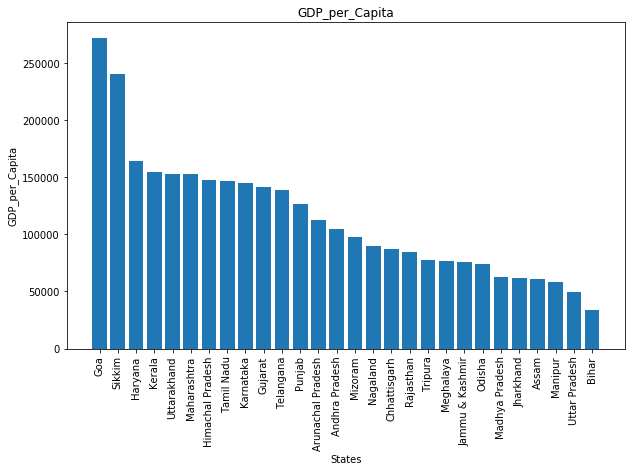

In [43]:
plt.figure(5,figsize=[10,6])
plt.bar(GDP_per_Capita.index,GDP_per_Capita.GDP_per_Capita)
plt.xticks(GDP_per_Capita.index, rotation='vertical')
plt.xlabel('States')
plt.ylabel('GDP_per_Capita')
plt.title('GDP_per_Capita')

From the above graph we can identify which are the top 5 and bottom 5 states based on GDP per Capita for the year 2014-15.   
#### Top 5 States are:   
    1.Goa   
    2.Sikkim  
    3.Haryana  
    4.Kerala  
    5.Uttarakhand                               
#### Bottom 5 States are:   
    1.Bihar   
    2.Uttar Pradesh   
    3.Manipur
    4.Assam   
    5.Jharkhand
    
Here we can see that Goa is having very high GDP but in our earlier graphs's it was performing very poorly. Hence this supports my hypothesis that we cannot judge the performance based on GSDP alone.(It is dependent on the population of the state. States with high population will have bloated values.)

In [44]:
round(float(GDP_per_Capita.iloc[0,:]/GDP_per_Capita.iloc[-1,:]),3)
## Ratio of highest GDP_per_Capita to lowest.

8.005

Ratio of the highest per capita GDP to the lowest per capita GDP = 8.005

### Plot the percentage contribution of the primary, secondary and tertiary sectors

In [45]:
Sector_Total=df_1B[df_1B['S.No.']=='Total']
Sector_Total.reset_index(inplace=True)
Sector_Total.drop(['S.No.','index'],axis=1,inplace=True)
Sector_Total.rename(columns={'2014-15':'Total'},inplace=True)

In [46]:
Total_GDP=df_1B[df_1B['S.No.']=='15']
Total_GDP.reset_index(inplace=True)
Total_GDP.drop(['S.No.','index'],axis=1,inplace=True)
Total_GDP.rename(columns={'2014-15':'GDP'},inplace=True)

In [47]:
Sector_Data=Sector_Total.merge(Total_GDP,left_on='Region',right_on='Region',how='left')
Sector_Data.rename(columns={'Item_x':'Sector','Item_y':'GSDP'},inplace=True)
Sector_Data.sort_values(by='GDP',ascending=False,inplace=True)

In [48]:
Sector_Data['%Total']=Sector_Data['Total']/Sector_Data['GDP']*100# Calculating percentage contribution of each sectors.

##### The best plot to show  % Contribution of Sector's distributed across each State would be using Stacked Bar Graph. 100% would be the Total_GDP of  each state and each stacks will represent the respective sectors. Stacked bar graphs are great for showing % of each sector's especially since there is a distinct additive relationship between them.

Text(0.5, 1.0, 'Sector Analysis')

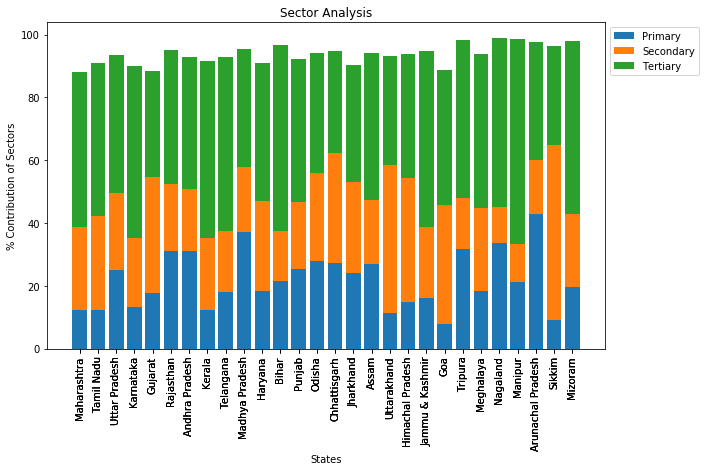

In [49]:
plt.figure(6,figsize=[10,6])
Primary=Sector_Data[Sector_Data.Sector=='Primary']
Primary.reset_index(inplace=True)
plt.bar(Primary.Region,Primary['%Total'])

Secondary=Sector_Data[Sector_Data.Sector=='Secondary']
Secondary.reset_index(inplace=True)
plt.bar(Secondary.Region,Secondary['%Total'],bottom=Primary['%Total'])

Tertiary=Sector_Data[Sector_Data.Sector=='Tertiary']
Tertiary.reset_index(inplace=True)
plt.bar(Tertiary.Region,Tertiary['%Total'],bottom=Secondary['%Total']+Primary['%Total'])

plt.xticks(Sector_Data.Region, rotation='vertical')
plt.legend(['Primary','Secondary','Tertiary'],bbox_to_anchor=(1, 1))
plt.ylabel('% Contribution of Sectors')
plt.xlabel('States')
plt.title('Sector Analysis')


##### The reason why Primary+Secondary+Tertiary does not equal to total GDP is because, the Gross State Domestic Product is not only dependent on these 3 sectors, but also the Taxes on Products and the Subsidies given on those Products.
##### Thus, TOTAL GSVA at basic prices= Primary+Secondary+Tertiary
##### And, Gross State Domestic Product=TOTAL GSVA at basic prices+Taxes on Products-Subsidies on Products

One Inference I can derive from this graph is that educated states like Kerala and Tamil Nadu are less dependent on revenue from primary sectors but more on tertiary and secondary sectors which requires workers with basic levels of education.

In [50]:
df_1B[df_1B.Region=='Kerala']

,2014-15,Item,Region,S.No.
240,5930617.0,"Agriculture, forestry and fishing",Kerala,1
241,558824.0,Mining and quarrying,Kerala,2
242,6489442.0,Primary,Kerala,Total
243,4273567.0,Manufacturing,Kerala,3
244,482470.0,"Electricity, gas, water supply & other utility...",Kerala,4
245,7314003.0,Construction,Kerala,5
246,12070040.0,Secondary,Kerala,Total
247,8557345.0,"Trade, repair, hotels and restaurants",Kerala,6
248,4020934.0,"Transport, storage, communication & services r...",Kerala,7
249,2010306.0,Financial services,Kerala,8


In [51]:
Rank_GDP=df_1B[df_1B['S.No.']=='17']
Rank_GDP.reset_index(inplace=True)
Rank_GDP.drop('index',axis=1,inplace=True)
Rank_GDP['Rank']=Rank_GDP['2014-15'].rank(pct=True)
#Percentile rank based on GDP per Capita
Cor=Rank_GDP.merge(Primary,left_on='Region',right_on='Region',how='inner')
Cor[['Total','Rank']].corr() ## Correlation matrix

,Total,Rank
Total,1.000000,-0.117185
Rank,-0.117185,1.000000


From the correlation matrix above, we can deduce that %contribution of Primary Sector and Percentile Rank based on per capita is negative correlated. i.e, if GDP per capita is higher, then that states' dependency on primary sector will be lower. Which supports by earlier inference that states with high GDP per Capita relies on Secondary and Tertiary sector more as they need skilled labours.

### Categorise the states into four groups based on the GDP per capita

In [52]:
GDP_per_Capita.describe(percentiles=[0.20,0.50,0.85])

,GDP_per_Capita
count,28.000000
mean,113941.678571
std,55404.888659
min,33954.000000
20%,67385.000000
50%,101332.000000
85%,153064.850000
max,271793.000000


In [53]:
q1=float(GDP_per_Capita.quantile(q=0.85))
q2=float(GDP_per_Capita.quantile(q=0.5))
q3=float(GDP_per_Capita.quantile(q=0.2))
GDP_per_Capita['GDP_Cat']=GDP_per_Capita['GDP_per_Capita'].apply(lambda x:'C1' if x>=q1 else 'C2' if x>=q2 else 'C3' if x>=q3 else 'C4')

In [54]:
df_1B[df_1B.Region=='Manipur']

,2014-15,Item,Region,S.No.
300,383140.0,"Agriculture, forestry and fishing",Manipur,1
301,NaN,Mining and quarrying,Manipur,2
302,383140.0,Primary,Manipur,Total
303,49501.0,Manufacturing,Manipur,3
304,27490.0,"Electricity, gas, water supply & other utility...",Manipur,4
305,143182.0,Construction,Manipur,5
306,220173.0,Secondary,Manipur,Total
307,262950.0,"Trade, repair, hotels and restaurants",Manipur,6
308,109726.0,"Transport, storage, communication & services r...",Manipur,7
309,30315.0,Financial services,Manipur,8


 Value for Mining and quarrying is NaN, I am imputing it with 0 as Agriculture, forestry and fishing and the Sum of Primary Sector are having the same value. Thus indicating that Manipur has no Revenue from Mining and Quarrying.

In [55]:
df_1B[pd.isnull(df_1B).any(axis=1)]

,2014-15,Item,Region,S.No.
301,NaN,Mining and quarrying,Manipur,2


In [56]:
df_1B=df_1B.fillna(0) #Imputation

In [57]:
Col=[str(i) for i in range(1,12)]
temp=df_1B[df_1B['S.No.'].isin(Col)]

In [58]:
Category=temp.merge(GDP_per_Capita,left_on='Region',right_on='Region',how='left')

In [59]:
Category.rename(columns={'2014-15':'Value'},inplace=True)
Total_GDP.drop('Item',axis=1,inplace=True)
Category=Category.merge(Total_GDP,left_on='Region',right_on='Region',how='left')

In [60]:
C1=Category[Category.GDP_Cat=='C1']
C2=Category[Category.GDP_Cat=='C2']
C3=Category[Category.GDP_Cat=='C3']
C4=Category[Category.GDP_Cat=='C4']

In [61]:
C1.head()

,Value,Item,Region,S.No.,GDP_per_Capita,GDP_Cat,GDP
55,308507.0,"Agriculture, forestry and fishing",Goa,1,271793.0,C1,4063307.0
56,3622.0,Mining and quarrying,Goa,2,271793.0,C1,4063307.0
57,1177608.0,Manufacturing,Goa,3,271793.0,C1,4063307.0
58,204110.0,"Electricity, gas, water supply & other utility...",Goa,4,271793.0,C1,4063307.0
59,165819.0,Construction,Goa,5,271793.0,C1,4063307.0


In [62]:
C1=C1.pivot_table(columns='Item',values=['Value','GDP'],aggfunc='sum').T
C2=C2.pivot_table(columns='Item',values=['Value','GDP'],aggfunc='sum').T
C3=C3.pivot_table(columns='Item',values=['Value','GDP'],aggfunc='sum').T
C4=C4.pivot_table(columns='Item',values=['Value','GDP'],aggfunc='sum').T

In [63]:
C1['%Value']=round(C1.Value/C1.GDP*100,2)
C2['%Value']=round(C2.Value/C2.GDP*100,2)
C3['%Value']=round(C3.Value/C3.GDP*100,2)
C4['%Value']=round(C4.Value/C4.GDP*100,2)

In [64]:
C1.sort_values(by='%Value',ascending=False,inplace=True)
C2.sort_values(by='%Value',ascending=False,inplace=True)
C3.sort_values(by='%Value',ascending=False,inplace=True)
C4.sort_values(by='%Value',ascending=False,inplace=True)

In [65]:
C1['Cumsum']=C1['%Value'].cumsum()
C2['Cumsum']=C2['%Value'].cumsum()
C3['Cumsum']=C3['%Value'].cumsum()
C4['Cumsum']=C4['%Value'].cumsum()

In [66]:
c1=C1.iloc[:7,:]
c2=C2.iloc[:8,:]
c3=C3.iloc[:8,:]
c4=C4.iloc[:7,:]

Text(0.5, 1.0, 'Category - C1')

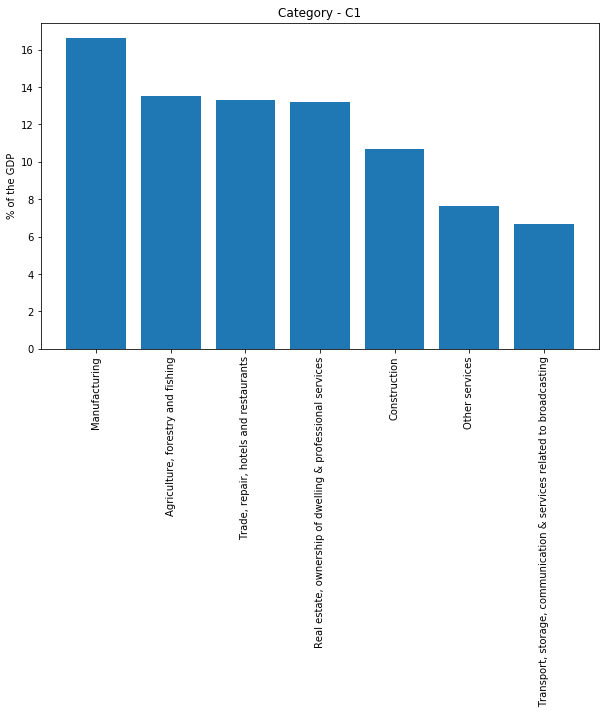

In [67]:
plt.figure(7,figsize=[10,6])
plt.bar(c1.index,c1['%Value'])
#plt.set_xticks(0.5)
'''
for x,y in zip(C1.index,C1['%Value']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center'''
plt.xticks(c1.index, rotation='90')
plt.ylabel('% of the GDP')
#plt.xlabel('Sub-Sectors')
plt.title('Category - C1')

These 7 sub-sectors contribute to approximately 80% of the GDP for Category-C1

Text(0.5, 1.0, 'Category - C2')

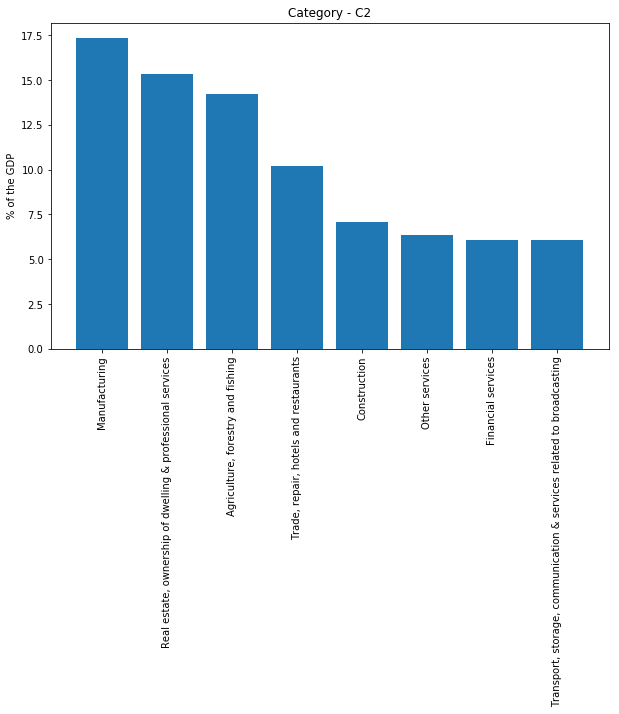

In [68]:
plt.figure(8,figsize=[10,6])
plt.bar(c2.index,c2['%Value'])
plt.xticks(c2.index, rotation='90')
plt.ylabel('% of the GDP')
#plt.xlabel('Sub-Sectors')
plt.title('Category - C2')

These 8 sub-sectors contribute to apporximately 80% of the GDP for Category-C2

Text(0.5, 1.0, 'Category - C3')

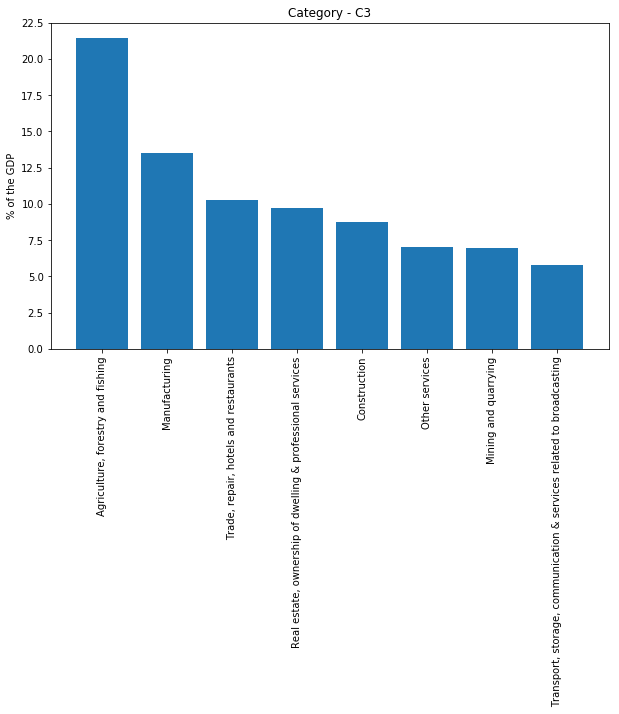

In [69]:
plt.figure(9,figsize=[10,6])
plt.bar(c3.index,c3['%Value'])
plt.xticks(c3.index, rotation='90')
plt.ylabel('% of the GDP')
#plt.xlabel('Sub-Sectors')
plt.title('Category - C3')

These 8 sub-sectors contribute to apporximately 80% of the GDP for Category-C3

Text(0.5, 1.0, 'Category - C4')

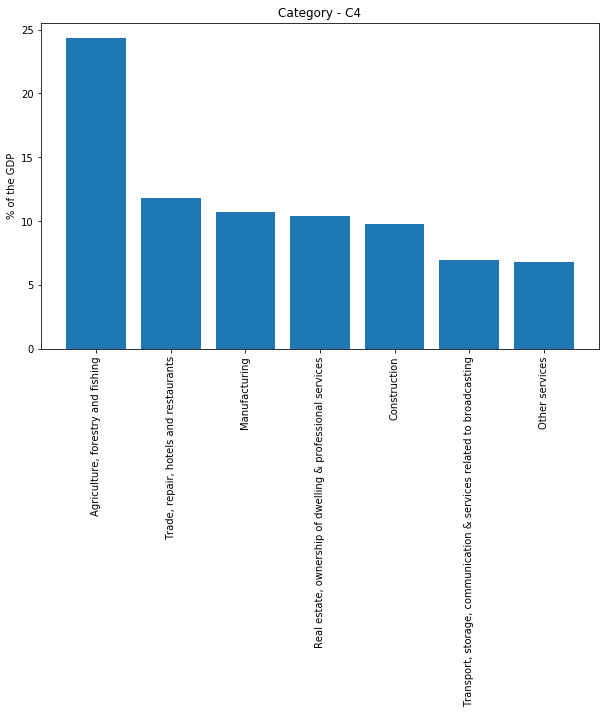

In [70]:
plt.figure(8,figsize=[10,6])
plt.bar(c4.index,c4['%Value'])
plt.xticks(c4.index, rotation='90')
plt.ylabel('% of the GDP')
#plt.xlabel('Sub-Sectors')
plt.title('Category - C4')

These 7 sub-sectors contribute to apporximately 80% of the GDP for Category-C4

##### * How does the GDP distribution of the top states (C1) differ from the others?

States in C1 are those which are performing as the best in the country. From the above graph's it is evident that it's highest form of revenue is Manufacturing. These are the most developed states in the country where job's are available in plenty hence is no surprise that manufacturing sector is thriving. In C3 category, most of it's revenue is focussed on Agriculture as they are not as developed as the others.  
Trade and Real Estate Sectors are also very strong in C1 as these are area's which usually boom in an economically positive environment.  
Most of the revenue in C1 states are focused on secondary and tertiary sectors which require skilled labourers,whereas C3 states are focused on primary sector.
##### * Which sub-sectors seem to be correlated with high GDP?
.Manufacturing  
.Trade, repair, hotels and restaurants  
.Real estate, ownership of dwelling & professional services  
.Construction  
##### * Which sub-sectors do the various categories need to focus on? 

###### 1. C1 states should focus on:  
    .Mining and quarrying
    .Electricity, gas, water supply & other utility services
    .Public administration
    .Financial services	
###### 2. C2 states should focus on: 
    .Mining and quarrying
    .Electricity, gas, water supply & other utility services
    .Public administration
    .Transport, storage, communication & services related to broadcasting
###### 3. C3 states should focus on: 
    .Electricity, gas, water supply & other utility services
    .Manufacturing
    .Financial services
    .Public administration
    .Transport, storage, communication & services related to broadcasting
###### 4. C4 States should focus on :
    .Manufacturing Sector
    .Financial Services
    .Public administration
##### * Why is C4,C3 and C2 states despite having more GDP than C1 is not performing as good? (GDP !!, not GDP per Capita)
Performance is calculated based on the GDP per population of the State. India has the 2nd largest population in the world and the disparity between the rich and the poor is predominant. C1 States might be having lower disparity between the rich and the poor and hence, better performance. C1 States have more educated citizens which could one reason why the disparity is less. One other reason why GDP of C1 is lesser is because it has fewer number of states than the others.

##### Finally, provide at least two recommendations for each category to improve the per capita GDP.
##### .C1 Category:
    The best ways to improve in this category is to :  
       1.Create more spending avenues.
       2.Improve existing infrastructure and Services such as Transportation, Hotels etc.
       3.Ensuring continued education to enable the growth of more skilled workers.
       4.Create Entrepreneurial development facilities.
##### .C2 Category:
    The best ways for imporovement in this category are:
        1.Get foreign investors to improve economy.
        2.Create new spending avenues.
        3.Improves existing Services.
        4.Improve educational facilities and create more skilled workers.
##### .C3 Category:
    The best ways to improve in C3 are:
        1.Create more jobs by developing the manufacturing sector.
        2.Improve public education and job awareness.
        3.Introduce new facilities and services.
##### .C4 Category:
    The ways to improve for C4 are:
        1.Improve public education 
        2.Improve general awareness
        3.Introduce better facilities
        4.Make sure people are healthy and employed.

## Part-II: GDP and Education Dropout Rates

In [71]:
Data_2=pd.read_csv('C:\\Users\\kjoseph\\Desktop\\Upgrad\\GDP Assignment\\GDP_Final\\rs_session243_au570_1.1.csv')

In [72]:
Data_2.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [73]:
len(Data_2[Data_2['Level of Education - State'].isin(States)]['Level of Education - State'])

25

From here we can see that only 25 State names are matching with our States list which holds name of all the states required for our analyis. This means there are some data quality issues with state names of the new file which needs to addressed. 

In [74]:
from difflib import get_close_matches
l={}
for i in States:
    l[i]=get_close_matches(i, Data_2['Level of Education - State'])#Find state names which closely matches with our state name's list
States_2=[]
for i in l:
    States_2.append(l[i][0])

In [75]:
len(Data_2[Data_2['Level of Education - State'].isin(States_2)]['Level of Education - State'])

28

Now all 28 states are matching, so we can proceed with the new States list States_2

In [76]:
Data_2=Data_2[Data_2['Level of Education - State'].isin(States_2)]

In [77]:
Data_2.reset_index(inplace=True)
Data_2.rename(columns={'Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015'},inplace=True)
Data_2=Data_2[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']] # Selecting only required columns.
# As for this analyis, we are only concerned with 2014-2015 data.

In [78]:
Data_2.insert(4,"Region",list(l.keys()))
Data_2=Data_2[['Region','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

In [79]:
Data_2[pd.isnull(Data_2).any(axis=1)]

,Region,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
3,Bihar,NaN,4.08,25.90
12,Kerala,NaN,NaN,12.32
23,Tamil Nadu,NaN,NaN,8.10


In [80]:
Data_2 ## Nan values are ignored in this analysis.

,Region,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra Pradesh,6.72,5.20,15.71
1,Arunachal Pradesh,10.82,6.71,17.11
2,Assam,15.36,10.51,27.06
3,Bihar,NaN,4.08,25.90
4,Chhattisgarh,2.91,5.85,21.26
5,Goa,0.73,0.07,11.15
6,Gujarat,0.89,6.41,25.04
7,Haryana,5.61,5.81,15.89
8,Himachal Pradesh,0.64,0.87,6.07
9,Jammu & Kashmir,6.79,5.44,17.28


In [81]:
Dropout_Analysis=Data_2.merge(GDP_per_Capita,left_on='Region',right_on='Region',how='left')

In [82]:
Sector_Data=Sector_Data.pivot_table(index='Region',columns='Sector',values='%Total').reset_index()

In [83]:
Sector_Data.head()

Sector,Region,Primary,Secondary,Tertiary
0,Andhra Pradesh,30.968080,19.923102,41.850453
1,Arunachal Pradesh,42.774946,17.152064,37.696846
2,Assam,26.889201,20.359070,46.982347
3,Bihar,21.448437,16.005825,59.317437
4,Chhattisgarh,27.239629,35.061805,32.295173


In [84]:
Dropout_Analysis=Dropout_Analysis.merge(Sector_Data,left_on='Region',right_on='Region',how='left')

In [85]:
Population=df_1B[df_1B['S.No.']=='16'][['Region','2014-15']].reset_index()
Population.rename(columns={'2014-15':'Population'},inplace=True)
Population.drop('index',axis=1,inplace=True)

In [86]:
Dropout_Analysis=Dropout_Analysis.merge(Population,left_on='Region',right_on='Region',how='left')

In [87]:
Dropout_Analysis.sort_values(by='GDP_per_Capita',ascending=False,inplace=True)

In [88]:
Dropout_Analysis[['GDP_per_Capita','Primary - 2014-2015']].corr()

,GDP_per_Capita,Primary - 2014-2015
GDP_per_Capita,1.000000,-0.559934
Primary - 2014-2015,-0.559934,1.000000


In [89]:
Dropout_Analysis[['GDP_per_Capita','Upper Primary - 2014-2015']].corr()

,GDP_per_Capita,Upper Primary - 2014-2015
GDP_per_Capita,1.000000,-0.545651
Upper Primary - 2014-2015,-0.545651,1.000000


In [90]:
Dropout_Analysis[['GDP_per_Capita','Secondary - 2014-2015']].corr()

,GDP_per_Capita,Secondary - 2014-2015
GDP_per_Capita,1.00000,-0.45935
Secondary - 2014-2015,-0.45935,1.00000


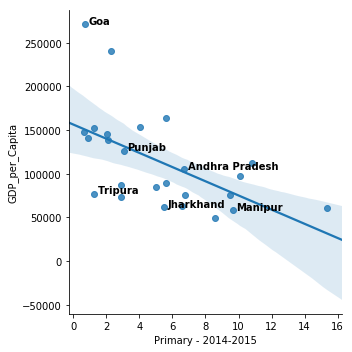

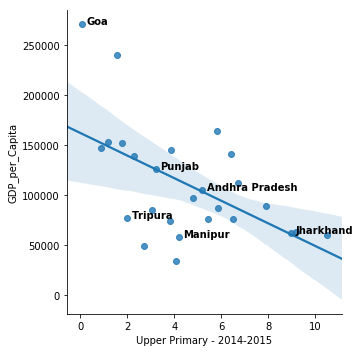

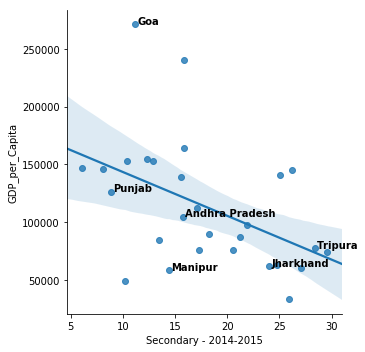

In [91]:
sns.lmplot(x='Primary - 2014-2015',y='GDP_per_Capita',data=Dropout_Analysis)
for line in range(0,Dropout_Analysis.shape[0],5):
     plt.text(Dropout_Analysis['Primary - 2014-2015'][line]+0.2, Dropout_Analysis['GDP_per_Capita'][line], Dropout_Analysis.Region[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
sns.lmplot(x='Upper Primary - 2014-2015',y='GDP_per_Capita',data=Dropout_Analysis)
for line in range(0,Dropout_Analysis.shape[0],5):
     plt.text(Dropout_Analysis['Upper Primary - 2014-2015'][line]+0.2, Dropout_Analysis['GDP_per_Capita'][line], Dropout_Analysis.Region[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
sns.lmplot(x='Secondary - 2014-2015',y='GDP_per_Capita',data=Dropout_Analysis)
for line in range(0,Dropout_Analysis.shape[0],5):
     plt.text(Dropout_Analysis['Secondary - 2014-2015'][line]+0.2, Dropout_Analysis['GDP_per_Capita'][line], Dropout_Analysis.Region[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

##### From the above graphs are correlation matrix we can see that :
    The student drop out rate is negatively correlated with the GDP_per_Capita of the states. That is, as the student drop out rates increases, the GDP_per_Capita of the State will decrease. Thus this analysis emphasizes the importance of education and its impact on our economy.
    For example, Goa is having the highest GDP_per_Capita and its drop out rate among each category is very less and Jharkhand which is having a low GDP_per_Capita is having a high drop out rate in Upper-Primary and Secondary category.
    

### Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

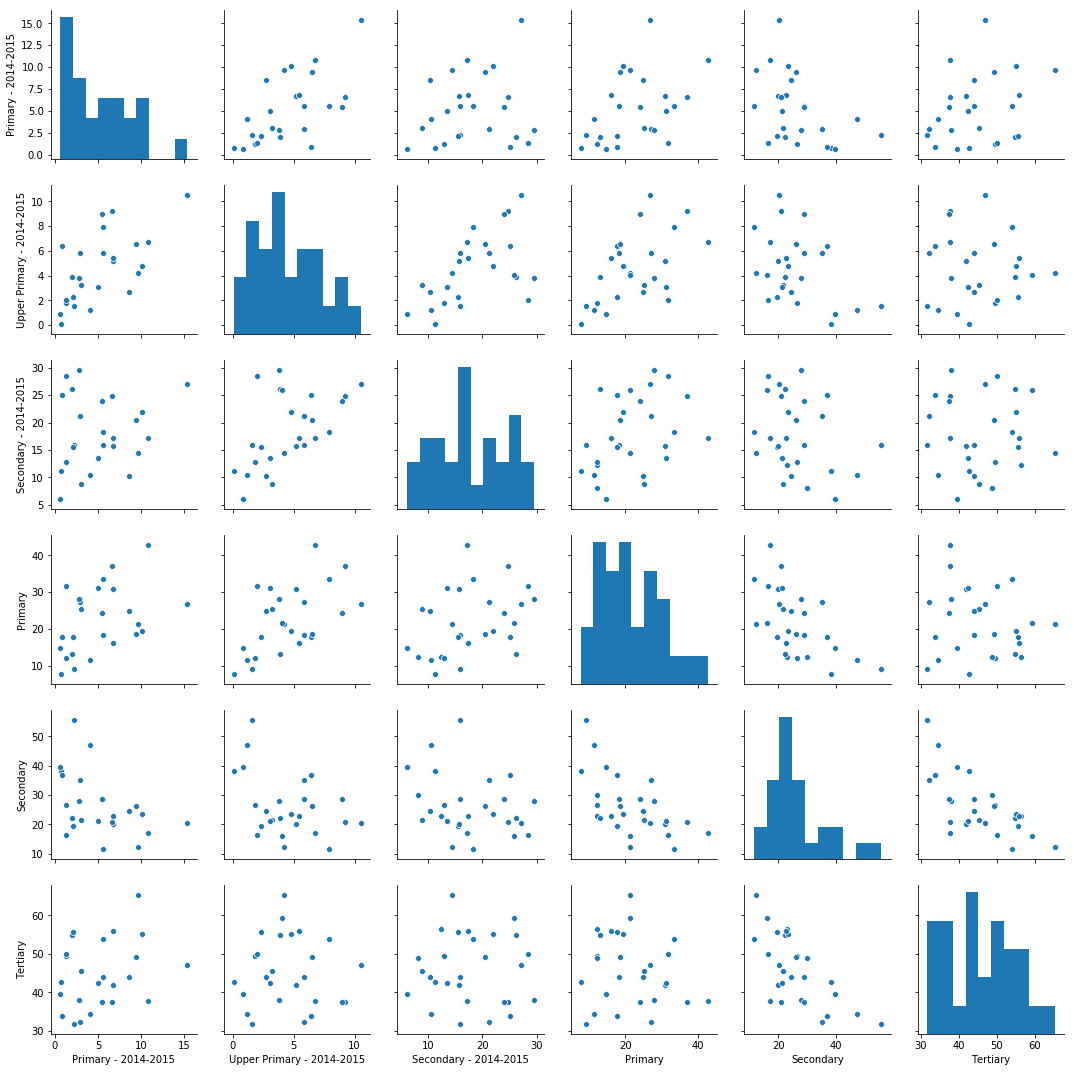

In [92]:
sns.pairplot(Dropout_Analysis[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Primary','Secondary','Tertiary']])
plt.show()

In [93]:
Dropout_Analysis[['Upper Primary - 2014-2015','Primary']].corr()

,Upper Primary - 2014-2015,Primary
Upper Primary - 2014-2015,1.000000,0.552295
Primary,0.552295,1.000000


In [94]:
Dropout_Analysis[['Upper Primary - 2014-2015','Secondary']].corr()

,Upper Primary - 2014-2015,Secondary
Upper Primary - 2014-2015,1.000000,-0.394896
Secondary,-0.394896,1.000000


In [95]:
Dropout_Analysis[['Upper Primary - 2014-2015','Tertiary']].corr()

,Upper Primary - 2014-2015,Tertiary
Upper Primary - 2014-2015,1.000000,-0.028605
Tertiary,-0.028605,1.000000


From the above pairplot and correlation matrix, it is evident that as dropout rates increases, primary sector value improves and secondary and tertiary sector decreases. i.e, Dropout rate and Primary sector is positively correlated. Dropout rate and other sectors are negatively correlated.  
This proves our hypothesis why C4 and C3 category states are more into primary sector jobs.

### Is there any correlation between dropout rates and population?

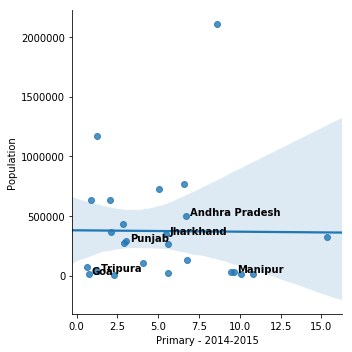

In [96]:
sns.lmplot(x='Primary - 2014-2015',y='Population',data=Dropout_Analysis)
for line in range(0,Dropout_Analysis.shape[0],5):
     plt.text(Dropout_Analysis['Primary - 2014-2015'][line]+0.2, Dropout_Analysis['Population'][line], Dropout_Analysis.Region[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        

In [97]:
Dropout_Analysis[['Population','Primary - 2014-2015']].corr()

,Population,Primary - 2014-2015
Population,1.000000,-0.009443
Primary - 2014-2015,-0.009443,1.000000


In [98]:
Dropout_Analysis[['Population','Upper Primary - 2014-2015']].corr()

,Population,Upper Primary - 2014-2015
Population,1.000000,-0.056981
Upper Primary - 2014-2015,-0.056981,1.000000


In [100]:
Dropout_Analysis[['Population','Secondary - 2014-2015']].corr()

,Population,Secondary - 2014-2015
Population,1.00000,-0.05625
Secondary - 2014-2015,-0.05625,1.00000


There is no correlation between drop out rates and population of each state. This result was just as expected, as I did not believe drop out rates will be affected by the population of the state and my above analysis supports this.